<a href="https://www.kaggle.com/code/devikasanthosh04/knn-algorithm-dataset-cancer-detection?scriptVersionId=147793528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knn-algorithm-dataset/KNNAlgorithmDataset.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/knn-algorithm-dataset/KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Let’s see how many of each type of diagnosis is in our data set

In [4]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# DATA PREPROCESSING
The ‘id’ and 'Unnamed: 32' column is dropped because it doesn’t influence the output ‘class’.

In [5]:
import seaborn as sns

# Dropping 'id' and 'Unnamed: 32' columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [6]:
# Creating a 'features' DataFrame without the 'diagnosis' column for the sake of simplicity
features = df.drop(['diagnosis'], axis=1)

In [7]:
features.shape

(569, 30)

<Axes: >

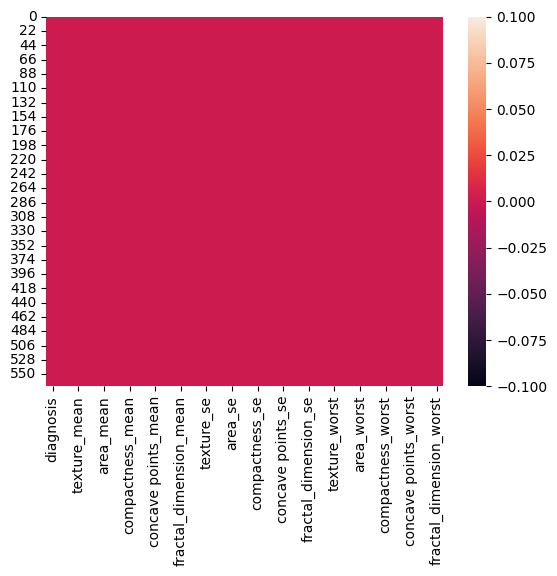

In [8]:
sns.heatmap(df.isnull())
# df.isnull() is True (value =1)if null value and False (value = 0) otherwise.

The value is 0 throughout. The heat map also suggests there are no missing values.

**Understanding the data
**

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**DATA VISUALIZATION**

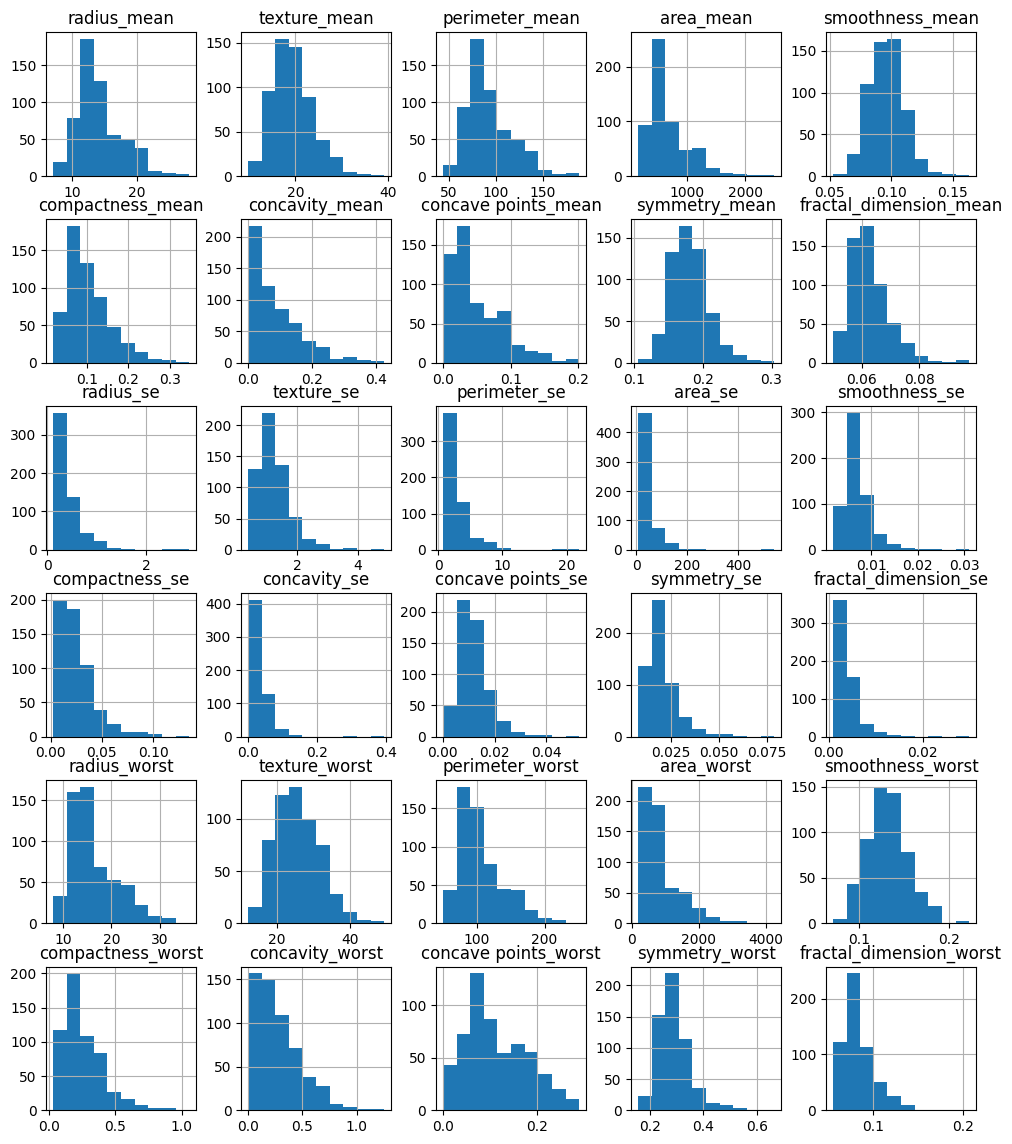

In [10]:
features.hist(figsize = (12,14))
plt.show()

# Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.
It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [11]:
x=features
y = df['diagnosis'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape[0])
print ('Test set:', x_test.shape,  y_test.shape[0])

Train set: (455, 30) 455
Test set: (114, 30) 114


# Normalize Data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [12]:
from sklearn import preprocessing
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
x_train_norm[0:5]

array([[-0.87737439, -0.99632936, -0.84836506, -0.80338557,  0.49895468,
        -0.25343046, -0.44489461, -0.40974147, -0.14917591,  0.91181301,
        -0.87726564, -0.73748   , -0.73949224, -0.63143437,  0.09691158,
        -0.3586472 , -0.14590043, -0.27834711,  0.34177255, -0.31277987,
        -0.91230425, -0.93180343, -0.82916072, -0.78166113,  0.40375445,
        -0.19949473, -0.20439713, -0.11026997,  0.63086499,  0.39596053],
       [ 0.23276443, -0.39373657,  0.19955174,  0.06617836,  1.51710005,
         0.49911419,  0.81221482,  0.94567762,  0.52718294, -0.09174563,
         3.16061901,  0.42267783,  2.69072263,  1.30330972,  0.92592222,
         0.53805901,  1.16006596,  2.64271295,  3.72106716, -0.32365438,
         0.47830957, -0.68743079,  0.42902417,  0.16382693,  0.37204124,
        -0.22912944,  0.30613569,  0.79850777,  0.81341746, -0.68247993],
       [ 0.20707998, -0.53919   ,  0.11856132,  0.05360084, -0.56933814,
        -0.63855513, -0.70290836, -0.52878641, -0

# Classification
# K nearest neighbor (KNN)
Import library
Classifier implementing the k-nearest neighbors vote.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Training
Let's start the algorithm with k=4 for now:

In [14]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [15]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))
x_test_norm[0:5]

array([[ 8.94771599e-02, -6.74953861e-01,  9.71207860e-02,
        -3.75095629e-02,  1.54532265e-01,  1.73631612e-01,
        -8.21181572e-02, -1.28014811e-01,  3.95701031e-01,
         1.68891165e-01, -1.89863453e-01, -7.25070172e-01,
        -7.65328736e-02, -1.94104377e-01, -8.84498140e-01,
         2.15972601e-01,  1.88203987e-01,  1.07322747e-01,
        -1.86189458e-01, -2.27023810e-01,  7.94149976e-02,
        -6.99901593e-01,  1.10116938e-01, -3.94986876e-02,
        -3.51927753e-02,  4.47712595e-01,  4.80994119e-01,
         3.99983528e-01,  3.11712481e-01,  1.47333856e-01],
       [-5.71166653e-01,  8.11273656e-01, -5.29345216e-01,
        -5.76831227e-01, -1.49507256e+00,  5.07372206e-02,
        -9.00941371e-02, -4.56765123e-01, -1.99090680e+00,
         4.90066111e-01, -1.07558397e+00,  4.11815998e-01,
        -5.61342937e-01, -7.85124553e-01, -6.95208447e-01,
         1.05755064e+00,  3.26722230e-01,  7.80689782e-01,
         5.69697093e-01,  1.65044551e+00, -7.29850267e-

# Predicting
We can use the model to make predictions on the test set:

In [16]:
yhat = neigh.predict(x_test_norm)
yhat[0:5]

array(['B', 'B', 'M', 'M', 'B'], dtype=object)

# Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9824561403508771


**What about other K?**
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [18]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    yhat=neigh.predict(x_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.92982456, 0.97368421, 0.99122807, 0.98245614, 0.97368421,
       0.97368421, 0.96491228, 0.97368421, 0.97368421])

<!-- ### K-Fold Cross-Validation ###
The following code demonstrates k-fold cross-validation, a technique used to assess a model's performance more robustly by splitting the dataset into multiple subsets and evaluating the model on each subset. This provides a more reliable estimate of model performance and helps detect overfitting. -->


 ### K-Fold Cross-Validation ###
The following code demonstrates k-fold cross-validation, a technique used to assess a model's performance more robustly by splitting the dataset into multiple subsets and evaluating the model on each subset. This provides a more reliable estimate of model performance and helps detect overfitting. -


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define your KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Define the number of folds (k)
k_folds = 3  # You can choose any value for k

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)  # You can shuffle the data if needed

# Perform k-fold cross-validation
scores = cross_val_score(knn, x_train_norm, y_train, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Scores: [0.98684211 0.95394737 0.94039735]
Mean Accuracy: 0.9603956082258627


# Plot the model accuracy for a different number of neighbors.

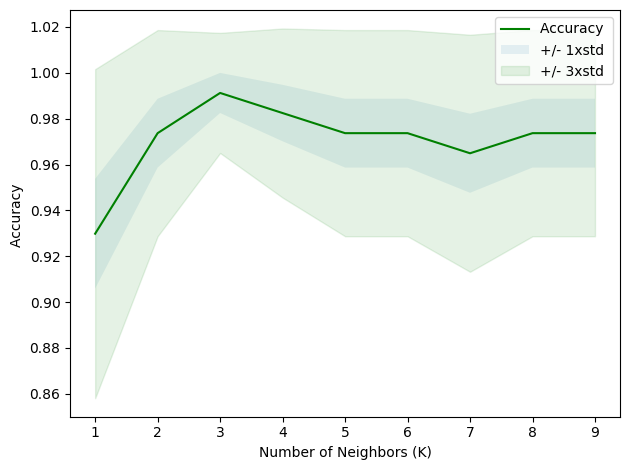

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9912280701754386 with k= 3


This completes the KNN Algorithm for the dataset.